In [231]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cross_validation import train_test_split

In [232]:
Ynames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist', 'identity']
featureNames = ['fLength', 'fWidth', 'fSize', 'fConc', 'fConc1', 'fAsym', 
             'fM3Long', 'fM3Trans', 'fAlpha', 'fDist']
filepath = 'data/magic04.data'
data = pd.read_csv(filepath, names=Ynames, header=None)
data['identity']= data['identity'].map({'g':1, 'h': 0}).astype(int) 
X = data[featureNames].values
Y = data['identity'].values.astype('int64')

In [233]:
X = StandardScaler().fit_transform(X)
train_Features, test_Features, train_Label, test_Label = train_test_split(X, Y, test_size=0.33, random_state=None) 
train_Features[:2]

array([[-0.51776952, -0.20768313, -0.36039341, -0.10572314, -0.08829355,
        -0.2225752 , -0.61813727,  0.52980418, -0.36049613,  0.66795252],
       [ 0.0870189 , -0.64890127, -0.31235985, -0.15714311, -0.10186724,
         0.5845306 ,  0.67811734, -0.07065989,  0.97969803,  0.91504263]])

In [234]:
test_Features[:2]

array([[-0.37862695, -0.0378547 ,  0.1442764 , -0.37376342, -0.38600984,
         0.11362894, -0.49280093, -0.51044708, -0.69971853, -0.0835413 ],
       [ 2.28256153,  1.76955127,  3.26666957, -1.76100866, -1.66193679,
         1.19728633,  2.07758815, -2.24522349, -0.06139948, -0.78932379]])

In [235]:
train_Label[:4]

array([0, 0, 1, 0])

In [236]:
train_Features.shape

(12743, 10)

In [237]:
test_Label[:4]

array([1, 0, 1, 1])

In [238]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

In [239]:
train_Features = train_Features.reshape(train_Features.shape[0], 2, 5, 1)

In [240]:
model = Sequential()

In [241]:
model.add(Conv2D(filters=1000,
                 kernel_size=(1,1),
                 padding='valid',
                 input_shape=(2,5,1), 
                 activation='relu'))

In [242]:
model.add(Conv2D(filters=1000,
                 kernel_size=(1,1),
                 padding='valid',
                 activation='relu'))

In [243]:
model.add(MaxPooling2D(pool_size=(1, 1)))

In [244]:
model.add(Dropout(0.25))

In [245]:
model.add(Flatten())

In [246]:
model.add(Dense(128, activation='tanh'))

In [247]:
model.add(Dropout(0.25))

In [248]:
model.add(Dense(1,activation='sigmoid'))

In [249]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 2, 5, 1000)        2000      
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 2, 5, 1000)        1001000   
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 2, 5, 1000)        0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 2, 5, 1000)        0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 10000)             0         
_________________________________________________________________
dense_32 (Dense)             (None, 128)               1280128   
_________________________________________________________________
dropout_18 (Dropout)         (None, 128)               0         
__________

In [250]:
model.compile(loss='mean_squared_error',
              optimizer='Nadam',metrics=['accuracy']) 


In [251]:
train_history =model.fit(x=train_Features, 
                         y=train_Label, 
                         validation_split=0.2, 
                         epochs=10, 
                         batch_size=200,verbose=1)

Train on 10194 samples, validate on 2549 samples
Epoch 1/10
10194/10194 [==============================] - 55s 5ms/step - loss: 0.1395 - acc: 0.8052 - val_loss: 0.1170 - val_acc: 0.8388
Epoch 2/10
10194/10194 [==============================] - 58s 6ms/step - loss: 0.1185 - acc: 0.8431 - val_loss: 0.1142 - val_acc: 0.8380
Epoch 3/10
10194/10194 [==============================] - 54s 5ms/step - loss: 0.1127 - acc: 0.8465 - val_loss: 0.1140 - val_acc: 0.8454
Epoch 4/10
10194/10194 [==============================] - 56s 5ms/step - loss: 0.1106 - acc: 0.8529 - val_loss: 0.1104 - val_acc: 0.8450
Epoch 5/10
10194/10194 [==============================] - 62s 6ms/step - loss: 0.1080 - acc: 0.8515 - val_loss: 0.1046 - val_acc: 0.8545
Epoch 6/10
10194/10194 [==============================] - 62s 6ms/step - loss: 0.1074 - acc: 0.8559 - val_loss: 0.1063 - val_acc: 0.8545
Epoch 7/10
10194/10194 [==============================] - 61s 6ms/step - loss: 0.1044 - acc: 0.8595 - val_loss: 0.1036 - val_acc:

In [252]:
import matplotlib.pyplot as plt
def show_train_history(train_history,train,validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel(train)
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='upper left')
    plt.show()

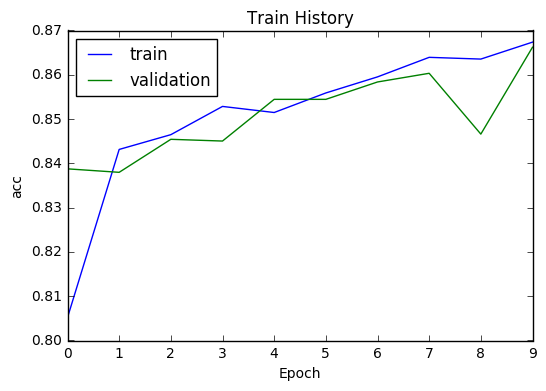

In [253]:
show_train_history(train_history,'acc','val_acc')

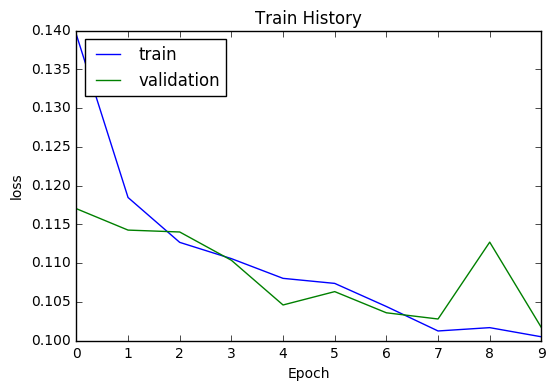

In [254]:
show_train_history(train_history,'loss','val_loss')

In [255]:
test_Features = test_Features.reshape(test_Features.shape[0], 2, 5, 1)

In [256]:
scores = model.evaluate(x=test_Features, 
                        y=test_Label)

6277/6277 [==============================] - 4s 703us/step


In [257]:
scores[1]

0.8684084753958268